In [78]:
import numpy as np
import pandas as pd
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
data = pd.read_csv('diabetic_data.csv')

In [80]:
data.shape

(101766, 50)

In [81]:
# data contains 50 columns and 101766 rows.

In [82]:
data.columns
#displaying the column names

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [83]:
#Description of variables

#The dataset used covers ~50 different variables to describe every hospital diabetes admission. 
#In this section we give an overview and brief description of the variables in this dataset.

#Patient identifiers

#encounter_id is a unique identifier for each admission, and patient_nbr uniquely identifies each patient

#Patient Demographics

#race, age, gender, weight cover the basic demographic information associated with each patient.  
#Payer_code is an additional variable that identifies which health insurance (Medicare /Medicaid / Commercial) the patient holds.

#Admission and discharge details

#admission_source_id and admission_type_id identify who referred the patient to the hospital (e.g. physician vs. emergency dept.)
#and what type of admission this was (Emergency vs. Elective vs. Urgent). And  discharge_disposition_id indicates where the 
#patient was discharged to after treatment.

#Patient Medical History

#num_outpatient: number of outpatient visits by the patient in the year prior to the current encounter
#num_inpatient: number of inpatient visits by the patient in the year prior to the current encounter
#num_emergency: number of emergency visits by the patient in the year prior to the current encounter

#Patient admission details

#medical_specialty: the specialty of the physician admitting the patient
#diag_1, diag_2, diag_3: ICD9 codes for the primary, secondary and tertiary diagnoses of the patient. 
#                        ICD9 are the universal codes that all physicians use to record diagnoses. There are various easy to use 
#                        tools to lookup what individual codes mean (Wikipedia is pretty decent on its own)

#time_in_hospital: the patient's length of stay in the hospital (in days)
#number_diagnoses: Total no. of diagnosis entered for the patient
#num_lab_procedures: No. of lab procedures performed in the current encounter
#num_procedures: No. of non-lab procedures performed in the current encounter
#num_medications: No. of distinct medications prescribed in the current encounter

#Clinical Results

#max_glu_serum: indicates results of the glucose serum test
#A1Cresult: indicates results of the A1c test

#Medication Details

#diabetesMed: indicates if any diabetes medication was prescribed
#change: indicates if there was a change in diabetes medication
#24 medication variables: indicate whether the dosage of the medicines was changed in any manner during the encounter

#Readmission indicator
#    Indicates whether a patient was readmitted after a particular admission. 
#    There are 3 levels for this variable: “NO” = no readmission, “< 30” = readmission within 30 days and 
#    “> 30” = readmission after more than 30 days. The 30 day distinction is of practical importance to 
#    hospitals because federal regulations penalize hospitals for an excessive proportion of such readmissions. 
#    The event of interest is readmitted within < 30 days.

In [84]:
data.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [87]:
data.replace('?' , np.NaN, inplace=True)

In [88]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [90]:
print(data.diag_1.dtype)

object


In [91]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category') 
    else:
        pass

In [92]:
data.admission_type_id = data.admission_type_id.astype('category')
data.discharge_disposition_id = data.discharge_disposition_id.astype('category')
data.admission_source_id = data.admission_source_id.astype('category')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null category
discharge_disposition_id    101766 non-null category
admission_source_id         101766 non-null category
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient 

In [94]:
# Columns which contains missing values are race, weight, payer_code, medical_specialty, diag_1, diag_2, diag_3

In [95]:
#data.race = data.race.replace(np.NaN, 'Race-Missing')
data.race.replace(np.NaN, 'Race-Missing').value_counts(normalize = True)

Caucasian          0.747784
AfricanAmerican    0.188766
Race-Missing       0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

In [96]:
#data.weight = data.weight.replace(np.NaN, 'Weight-Missing')
data.weight.replace(np.NaN, 'Weight-Missing').value_counts(normalize = True)

Weight-Missing    0.968585
[75-100)          0.013128
[50-75)           0.008814
[100-125)         0.006142
[125-150)         0.001425
[25-50)           0.000953
[0-25)            0.000472
[150-175)         0.000344
[175-200)         0.000108
>200              0.000029
Name: weight, dtype: float64

In [97]:
data.payer_code.replace(np.NaN, 'Missing').value_counts(normalize = True)

Missing    0.395574
MC         0.318761
HM         0.061651
SP         0.049201
BC         0.045742
MD         0.034707
CP         0.024890
UN         0.024055
CM         0.019034
OG         0.010151
PO         0.005817
DM         0.005395
CH         0.001435
WC         0.001327
OT         0.000934
MP         0.000776
SI         0.000540
FR         0.000010
Name: payer_code, dtype: float64

In [98]:
data.medical_specialty.replace(np.NaN, 'Missing').value_counts(normalize = True)

Missing                              0.490822
InternalMedicine                     0.143810
Emergency/Trauma                     0.074337
Family/GeneralPractice               0.073109
Cardiology                           0.052591
Surgery-General                      0.030452
Nephrology                           0.015850
Orthopedics                          0.013757
Orthopedics-Reconstructive           0.012116
Radiologist                          0.011202
Pulmonology                          0.008559
Psychiatry                           0.008392
Urology                              0.006731
ObstetricsandGynecology              0.006594
Surgery-Cardiovascular/Thoracic      0.006407
Gastroenterology                     0.005542
Surgery-Vascular                     0.005238
Surgery-Neuro                        0.004599
PhysicalMedicineandRehabilitation    0.003842
Oncology                             0.003420
Pediatrics                           0.002496
Hematology/Oncology               

In [99]:
data.medical_specialty.unique()

[Pediatrics-Endocrinology, NaN, InternalMedicine, Family/GeneralPractice, Cardiology, ..., Perinatology, Neurophysiology, Endocrinology-Metabolism, DCPTEAM, Resident]
Length: 73
Categories (72, object): [Pediatrics-Endocrinology, InternalMedicine, Family/GeneralPractice, Cardiology, ..., Neurophysiology, Endocrinology-Metabolism, DCPTEAM, Resident]

In [100]:
data.diag_1.replace(np.NaN, 'Missing').value_counts(normalize = True)

428       0.067429
414       0.064668
786       0.039463
410       0.035513
486       0.034471
427       0.027180
491       0.022355
715       0.021137
682       0.020066
434       0.019928
780       0.019840
996       0.019329
276       0.018562
38        0.016587
250.8     0.016508
599       0.015673
584       0.014936
V57       0.011861
250.6     0.011625
518       0.010957
820       0.010632
577       0.010387
493       0.010377
435       0.009984
562       0.009718
574       0.009483
296       0.008805
560       0.008608
250.7     0.008559
250.13    0.008362
            ...   
870       0.000010
133       0.000010
325       0.000010
207       0.000010
988       0.000010
543       0.000010
10        0.000010
217       0.000010
976       0.000010
649       0.000010
605       0.000010
391       0.000010
V67       0.000010
84        0.000010
838       0.000010
98        0.000010
833       0.000010
250.51    0.000010
114       0.000010
691       0.000010
895       0.000010
700       0.

In [101]:
data.diag_1[366]

'789'

In [102]:
data.diag_2.unique()

[NaN, 250.01, 250, 250.43, 157, ..., 123, 884, V60, 843, 927]
Length: 749
Categories (748, object): [250.01, 250, 250.43, 157, ..., 884, V60, 843, 927]

In [103]:
data[data.diag_1 == np.NaN]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [104]:
data.readmitted.value_counts(normalize = True)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [105]:
data.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

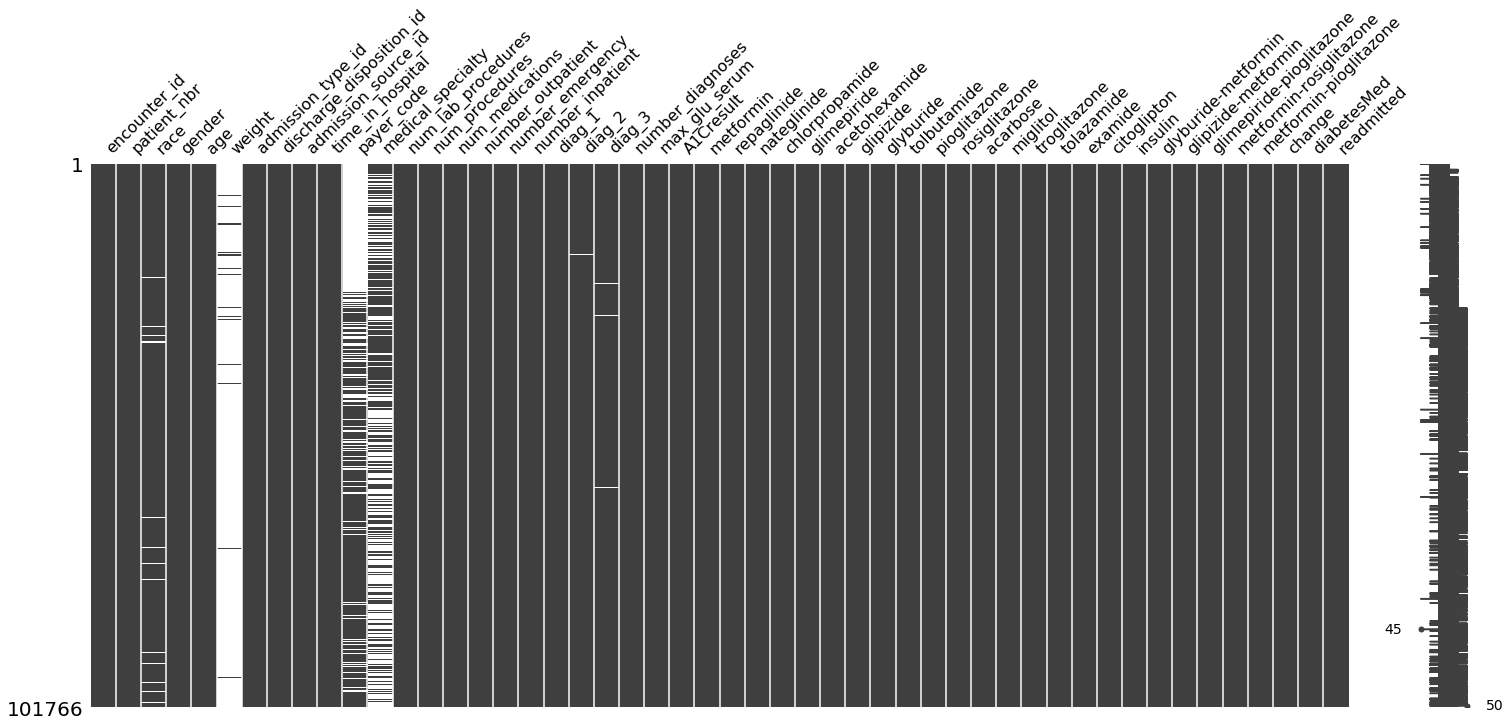

In [106]:
mn.matrix(data)

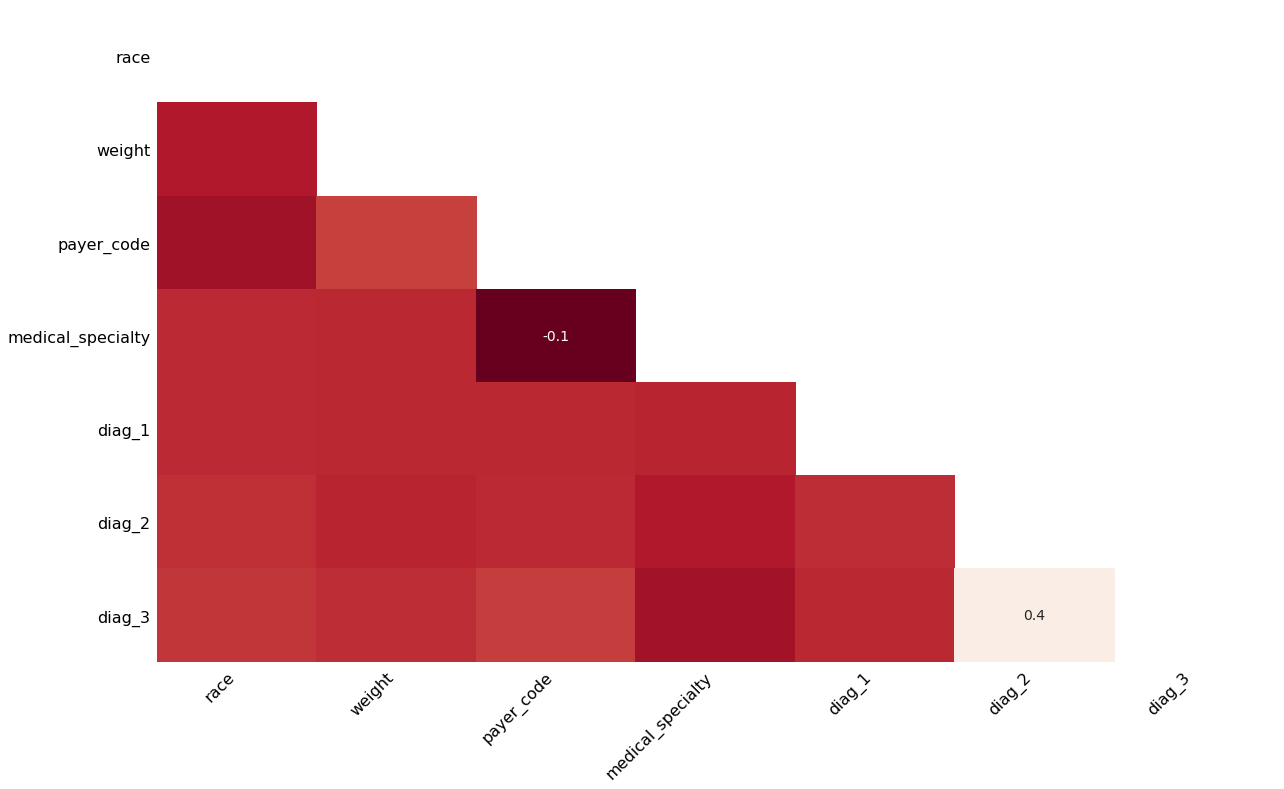

In [107]:
mn.heatmap(data)

In [108]:
# Any columns that are 100% populated do not show up in this matrix, which is why we see the 7 columns that we do. 

# We see the correlation value of -0.1 between the Payer_code and Medical_Specialty columns. A correlation of -1 means if one 
# column has a value, the other NEVER has a value. A correlation of 1 means if one column has a value the other 
# ALWAYS has a value. The value we see between Medical_specialty and Payer_code means roughly: more often than not, patients
# that have a diag_2 have an diag_3.


# If there are shaded boxes in the heatmap with no numbers, that means the correlation is very close to (but not exactly) 0, 
# meaning there is no relationship at all between the presense of the variables. In this case, and based upon the fact 
# we didn't see missing values for these columns in the matrix, we can assume there are a small number of missing values
# for these columns and they're randomly distributed.

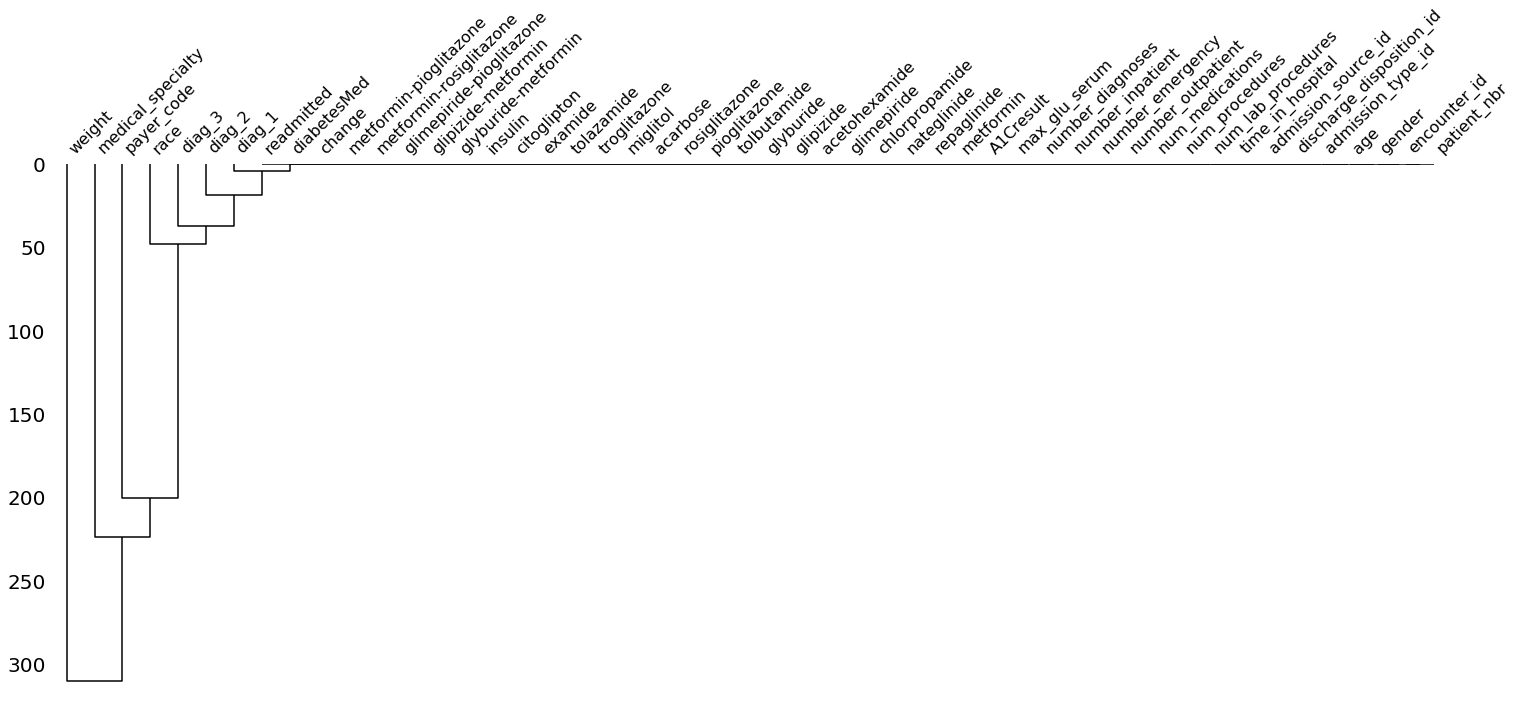

In [109]:
mn.dendrogram(data)


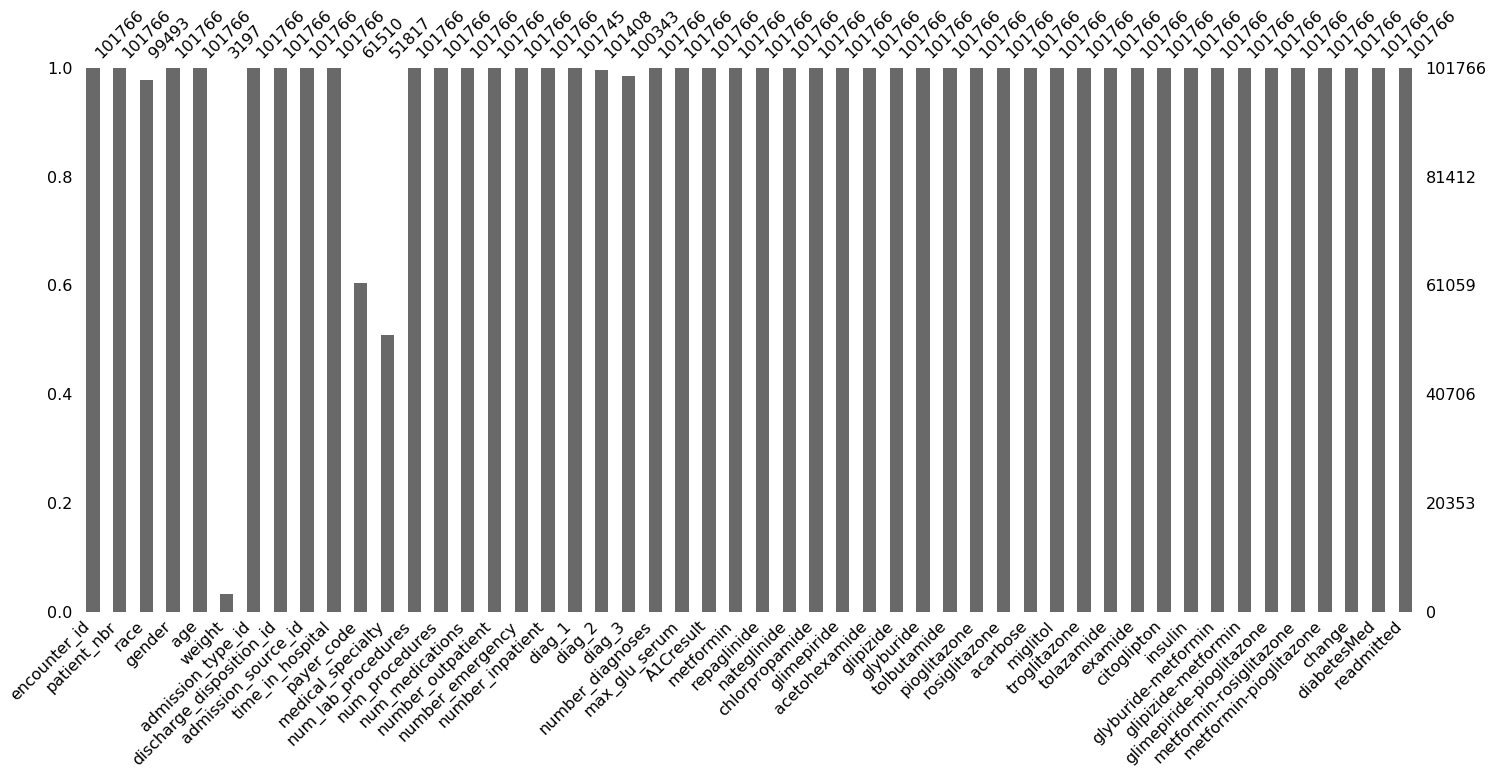

In [110]:
mn.bar(data)

In [111]:
from scipy.stats import chisquare,chi2_contingency

In [112]:
data.weight = data.weight.replace(np.NaN, 'Weight-Missing')
data.weight.value_counts()

Weight-Missing    98569
[75-100)           1336
[50-75)             897
[100-125)           625
[125-150)           145
[25-50)              97
[0-25)               48
[150-175)            35
[175-200)            11
>200                  3
Name: weight, dtype: int64

In [113]:
# Goodness of Fit Test between 2 categorical variables

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table


In [114]:
contingency = pd.crosstab(data.gender,data.weight)

In [115]:
contingency

weight,>200,Weight-Missing,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
gender,,,,,,,,,,
Female,2,53060,22,242,60,18,5,71,595,633
Male,1,45506,26,383,85,17,6,26,302,703
Unknown/Invalid,0,3,0,0,0,0,0,0,0,0


In [116]:
chi2, p, dof, ex = chi2_contingency(contingency)

In [117]:
print('P-Value is : ' , p)

P-Value is :  4.1127287633289807e-25


In [118]:
data.race = data.race.replace(np.NaN, 'Race-Missing')
data.race.value_counts(normalize = True)

Caucasian          0.747784
AfricanAmerican    0.188766
Race-Missing       0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

In [119]:
contingency = pd.crosstab(data.race,data.weight)

In [120]:
contingency

weight,>200,Weight-Missing,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
race,,,,,,,,,,
AfricanAmerican,1,19097,6,27,5,1,1,4,25,43
Asian,0,632,0,0,0,0,0,0,8,1
Caucasian,2,73192,40,567,129,33,9,88,816,1223
Hispanic,0,2037,0,0,0,0,0,0,0,0
Other,0,1476,1,2,2,0,0,1,12,12
Race-Missing,0,2135,1,29,9,1,1,4,36,57


In [121]:
chi2, p, dof, ex = chi2_contingency(contingency)

In [122]:
print('P-Value is : ' , p)

P-Value is :  1.1126508093704084e-116


In [123]:
contingency = pd.crosstab(data.age,data.weight)

In [124]:
contingency

weight,>200,Weight-Missing,[0-25),[100-125),[125-150),[150-175),[175-200),[25-50),[50-75),[75-100)
age,,,,,,,,,,
[0-10),0,156,3,0,0,0,0,2,0,0
[10-20),0,673,0,0,0,0,0,4,14,0
[20-30),0,1588,1,9,1,1,0,1,39,17
[30-40),1,3690,1,10,9,2,0,4,24,34
[40-50),0,9454,7,66,25,4,4,7,38,80
[50-60),0,16756,4,138,45,11,5,13,96,188
[60-70),2,21763,12,193,36,13,1,13,155,295
[70-80),0,25130,14,174,22,4,1,15,241,467
[80-90),0,16658,6,35,7,0,0,29,231,231


In [125]:
chi2, p, dof, ex = chi2_contingency(contingency)

In [126]:
print('P-Value is : ' , p)

P-Value is :  3.1898819719701453e-99


### Subsetting categorical and numerical columns

In [127]:
cat_col = []
num_col = []
for column in data.columns:
    if data[column].dtype == 'int64':
        num_col.append(column)
    else:
        cat_col.append(column)

In [128]:
categorical_data = data[cat_col]

In [129]:
numerical_data = data[num_col]

In [130]:
categorical_data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Weight-Missing,6,25,1,NaN,Pediatrics-Endocrinology,250.83,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Weight-Missing,1,1,7,NaN,NaN,276,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Weight-Missing,1,1,7,NaN,NaN,648,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Weight-Missing,1,1,7,NaN,NaN,8,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Weight-Missing,1,1,7,NaN,NaN,197,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [131]:
numerical_data.patient_nbr.value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Lengt

In [132]:
#The highest number of visits by any patient is 40: Patient-ID : 88785891     

In [133]:
numerical_data.encounter_id.value_counts()

96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int64

In [134]:
#Encounter_id can be dropped. Its just a unique number for each visit

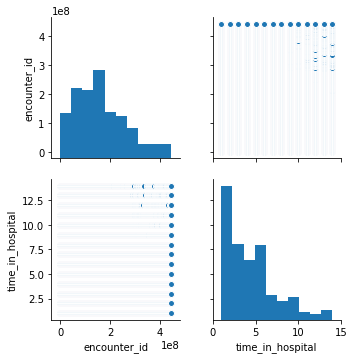

In [135]:
sns.pairplot(numerical_data, x_vars=['encounter_id','time_in_hospital'], y_vars=['encounter_id','time_in_hospital'])

In [136]:
numerical_data.columns

Index(['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
      dtype='object')

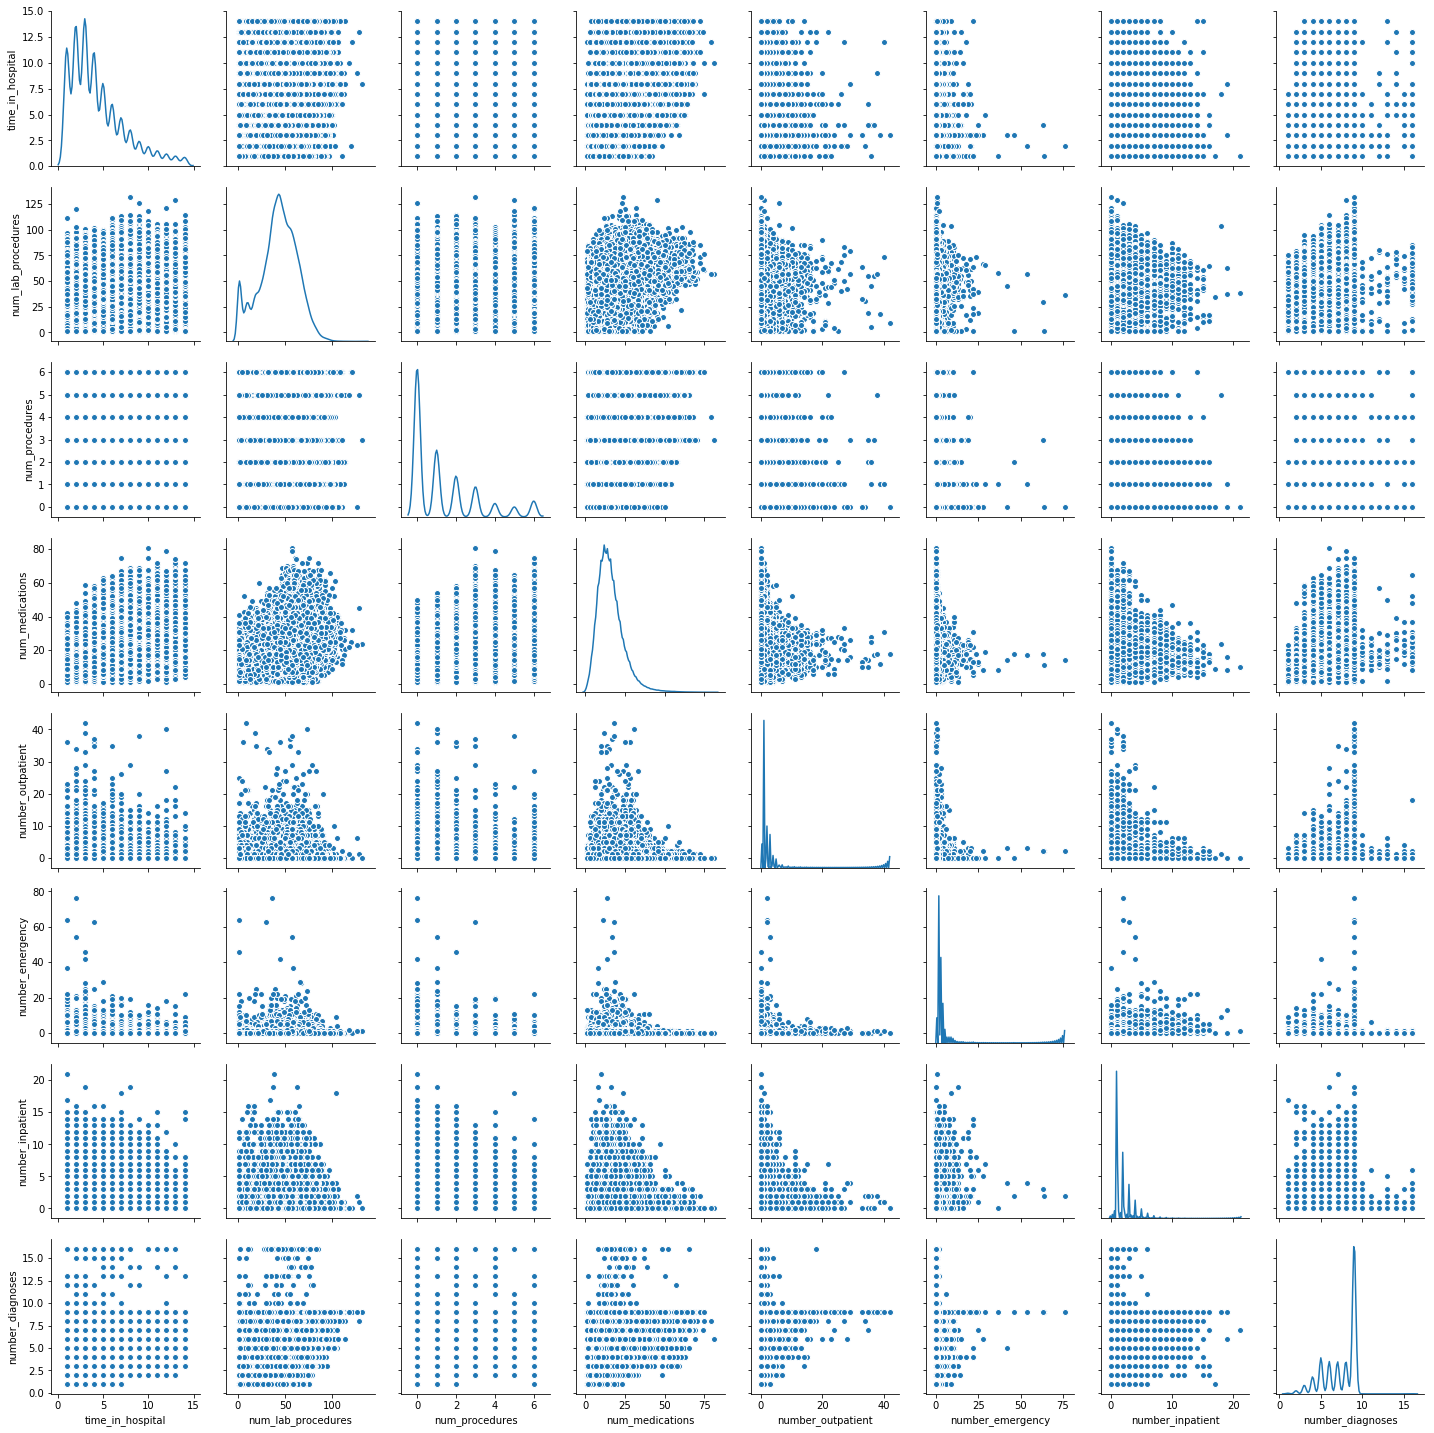

In [137]:
sns.pairplot(numerical_data, x_vars=['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],y_vars=['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'], diag_kind = 'kde')

In [138]:
# Observations

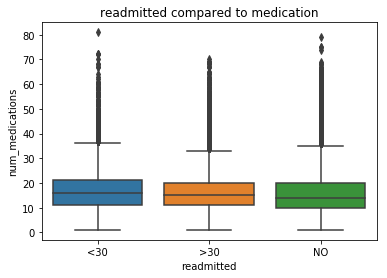

In [139]:
sns.boxplot(x = "readmitted", y = "num_medications", data = data)
plt.title('readmitted compared to medication')
plt.show()

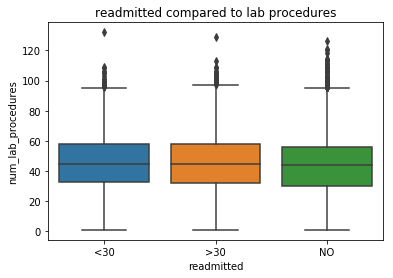

In [140]:
sns.boxplot(x = "readmitted", y = "num_lab_procedures", data = data)
plt.title('readmitted compared to lab procedures')
plt.show()

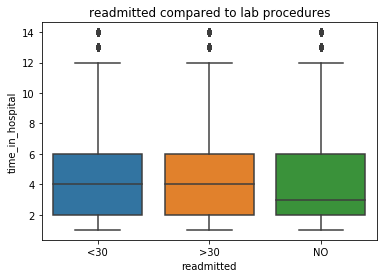

In [141]:
sns.boxplot(x = "readmitted", y = "time_in_hospital", data = data)
plt.title('readmitted compared to lab procedures')
plt.show()


In [142]:
### ANOVA : 
#Ho: Avg time spent at the hospital for people who are readmitted is equal to the avg time spent at the hospital 
#    who are not readmitted
#H1: Avg time are different
                

In [143]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('time_in_hospital ~ readmitted', data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq        df           F        PR(>F)
readmitted    3025.523625       2.0  170.330886  1.411815e-74
Residual    903788.997413  101763.0         NaN           NaN


In [144]:
#p-value is very small. At 5% level of significance, we reject the null and accept the alternate that one of the category 
#means differ from the other

In [145]:
# To determine which two means are different, we use Tukey-krammer HSD test 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(data['time_in_hospital'], data['readmitted']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 <30    >30   -0.2727   -0.348 -0.1974  True 
 <30     NO   -0.5138  -0.5858 -0.4418  True 
 >30     NO   -0.2411  -0.2887 -0.1936  True 
---------------------------------------------


In [146]:
# This shows that statistically all means are different

In [147]:
contingency = pd.crosstab(data.insulin,data.readmitted)

In [148]:
contingency

readmitted,<30,>30,NO
insulin,,,
No,4756,15949,26678
Up,1470,4362,5484
Steady,3433,10482,16934
Down,1698,4752,5768


In [149]:
chi2, p, dof, ex = chi2_contingency(contingency)

In [150]:
p

2.1265863574275524e-108

In [151]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [152]:
cramers_v(categorical_data.insulin, categorical_data.readmitted)

0.05009207462186602